# Customer Segmentation with K- Means

In [104]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt 

In [80]:
df=pd.read_csv("Cust_Segmentation.csv")

In [81]:
df.head()


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [82]:
df.columns

Index(['Customer Id', 'Age', 'Edu', 'Years Employed', 'Income', 'Card Debt',
       'Other Debt', 'Defaulted', 'Address', 'DebtIncomeRatio'],
      dtype='object')

In [83]:
df.index

RangeIndex(start=0, stop=850, step=1)

In [84]:
df.shape

(850, 10)

In [85]:
df.size

8500

In [86]:
df.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [87]:
df.isnull().sum().sum()

150

In [88]:
df.dropna(inplace=True)

In [89]:
df.isnull().sum().sum()

0

In [90]:
df.head(2)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8


In [91]:
df.drop("Address",axis=1,inplace=True)

In [92]:
df.head(2)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8


In [93]:
from sklearn.preprocessing import StandardScaler
X=df.values[:,1:]

In [94]:
scaled= StandardScaler().fit_transform(X)

In [95]:
scaled

array([[ 0.76830405,  0.29879269, -0.35900652, ..., -0.60428433,
        -0.59494973, -0.58052847],
       [ 1.51908977, -0.77932527,  2.64702891, ...,  1.5706204 ,
        -0.59494973,  0.37222169],
       [-0.23274357,  0.29879269,  0.24220057, ...,  0.83520125,
         1.68081427,  1.55949495],
       ...,
       [-1.2337912 ,  2.45502862, -1.26081715, ...,  0.04620852,
         1.68081427,  3.39170678],
       [-0.35787453, -0.77932527,  0.54280411, ..., -0.71904138,
        -0.59494973, -1.07889008],
       [ 2.14474454, -0.77932527,  1.1440112 , ...,  0.17648972,
        -0.59494973, -0.24340149]])

## Modelling

In [96]:
clus_num=3
k_means=KMeans(init="k-means++",n_clusters=clus_num,n_init=12)
k_means.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=12, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [97]:
labels=k_means.labels_

In [98]:
print(labels)

[0 1 1 0 2 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 2 0 0 0 1 0
 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 2 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1
 0 0 0 0 0 0 1 0 1 2 0 1 0 0 0 0 2 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 2 0 0 0 1 0 1
 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 2 0 0 0 0 0 1 0 0 0
 2 0 0 0 1 0 2 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 2 0 0 0 0 0 1 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 

In [99]:
df["labels"]= labels

In [100]:
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,labels
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,1
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2


In [102]:
df.groupby('labels').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
labels,,,,,,,,,
0,439.80226,32.775895,1.632768,6.169492,30.642185,1.003795,2.090910,0.284369,10.146893
1,403.56129,41.103226,1.916129,15.135484,81.122581,3.024935,5.605258,0.180645,10.848387
2,374.00000,44.785714,3.000000,17.857143,219.714286,6.115429,11.546357,0.285714,8.064286


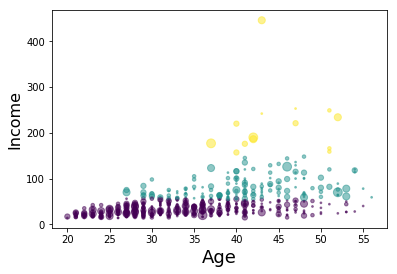

In [105]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()


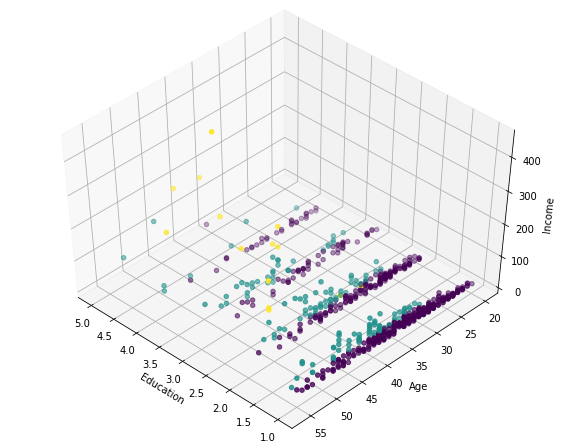

In [106]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))